# Black Friday Purchase Forcasting
### Dataset
https://www.kaggle.com/datasets/sdolezel/black-friday

<div>
    <h2>Problem Statement</h2>
A retail company "ABC Private Limited" wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics <i>(age, gender, marital status, city_type, stay_in_current_city)</i>, product details <i>(product_id and product category)</i> and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.
    </div>

<div class="alert alert-info">
    <h2>Plan for the project:</h2>
    <ol>
        <li>Load the dataset</li>
        <li>Exploratory Data Analysis</li>
        <li>Feature Engineering
            <ol>
                <li>Feature generating</li>
                <li>Feature selection</li>
                <li>Feature scaling</li>
            </ol>
        </li>
        <li>Model selection</li>
        <li>Hyper-parameter tuning (GridSearchCV)</li>
        <li>Measure Model performance (cross validation)</li>
    </ol>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('black_friday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


<div class='alert alert-info'>
    <h3>Observations:</h3>
    <ol>
        <li>Number of observations: <b>550068</b></li>
        <li>Number of columns: <b>12</b></li>
        <li>User_ID and Product_ID columns are not usable</li>
    </ol>
</div>

#### Drop User_ID and Product_ID columns

In [6]:
df.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Explor different features for categorical features

<div class="alert alert-info">
    By looking at above dataset, without doing any further analysis, we can see that following features are categorical features.
    <ol>
        <li>Gender</li>
        <li>Age (Age groups)</li>
        <li>City_category</li>
        <li>Marital_Status</li>
    </ol>
    </div>

### Further exploring the features...

In [8]:
df.Stay_In_Current_City_Years.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [9]:
df['Product_Category_1'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

<div class='alert alert-info'>
    <h3>Observations:</h3>
    <ol>
        <li><b>Stay_In_Current_City_Years</b> can be considered as a categorical feature.</li>
        <li><b>Product_Category_1, Product_Category_2 and Product_Category_3</b> should be considered as <b>categorical</b> features.</li>
    </ol>
    <h4>Every independent feature in the dataset is a categorical feature.</h4>
</div>

## Exploratory Data Analysis (EDA)

#### clean up **Stay_In_Current_City_Years** feature
we can see Stay_In_Current_City_Years has a value like **4+** which is a non-numeric value. We can remove the + sign and make the entire field numeric easily.

In [11]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')
df.head()

C:\Users\navilog\AppData\Local\Temp\ipykernel_20360\2030241946.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4,0,8,NaN,NaN,7969


### Dealing with missing values

In [15]:
df.isna().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173637
Product_Category_3            383247
Purchase                           0
dtype: int64

<div class='alert alert-info'>
    <h3>Observations:</h3>
    <h4>Product_Category_2 and Product_Category_3 have huge number of NaN values.</h4>
    Since the numner is very large, we cannot drop those records.<br/>
    Since these fields are <b>categorical</b>, we can use <b>mode</b> to replace NaN values.
</div>

In [19]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [20]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,M,55+,16,C,4,0,8,8.0,16.0,7969


In [21]:
df.isna().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [46]:
df.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [49]:
# convert Stay_In_Current_City_Years into int
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [50]:
df.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

### Univariate Analysis

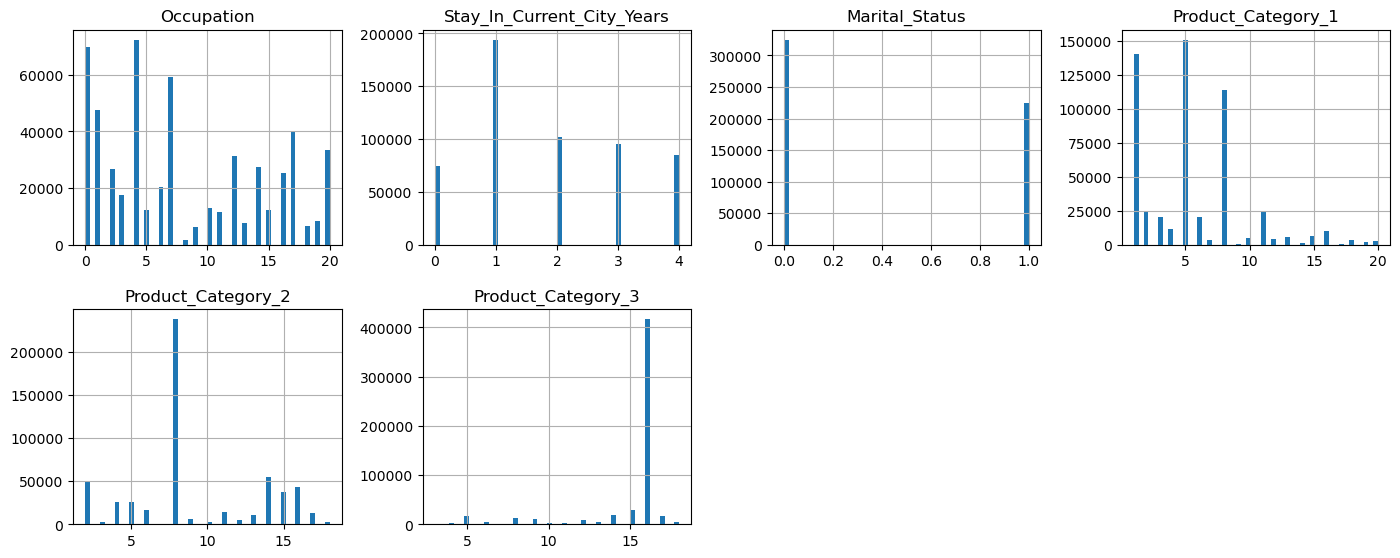

In [51]:
columns = list(df)[0:-1] # select first 8 colums
df[columns].hist(bins=50, figsize=(17, 50), layout=(14, 4))
plt.show()

<Axes: >

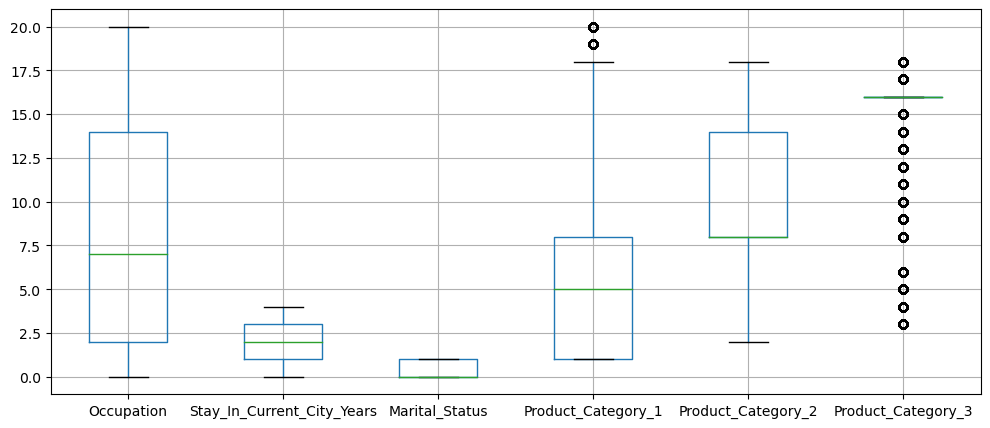

In [53]:
df.loc[:, list(df)[0:-1]].boxplot(figsize=(12, 5))

In [54]:
df.corr(numeric_only=True)

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.030005,0.024280,-0.007618,0.001566,0.000246,0.020833
Stay_In_Current_City_Years,0.030005,1.000000,-0.012819,-0.004213,-0.000748,0.000016,0.005422
Marital_Status,0.024280,-0.012819,1.000000,0.019888,0.010260,0.013978,-0.000463
Product_Category_1,-0.007618,-0.004213,0.019888,1.000000,0.279247,0.317944,-0.343703
Product_Category_2,0.001566,-0.000748,0.010260,0.279247,1.000000,0.463188,-0.128651
Product_Category_3,0.000246,0.000016,0.013978,0.317944,0.463188,1.000000,-0.185945
Purchase,0.020833,0.005422,-0.000463,-0.343703,-0.128651,-0.185945,1.000000


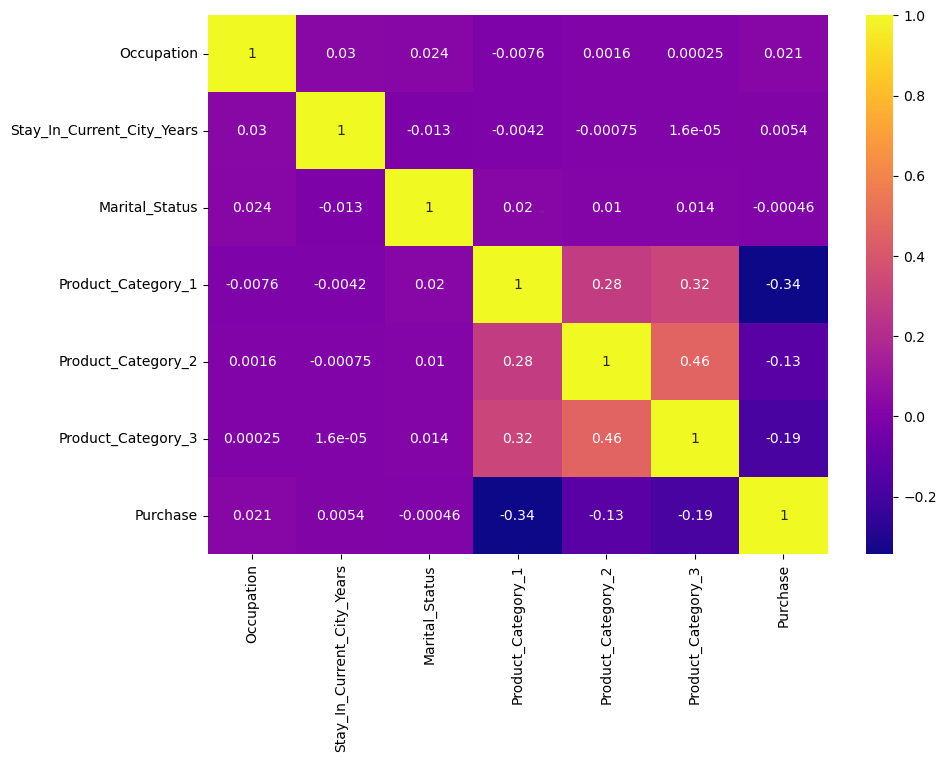

In [59]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), vmax=1, square=False, annot=True, cmap='plasma')
plt.show()

<div class='alert alert-info'>
    <h3>Observations:</h3>
    <h4>Stay_In_Current_City_Years and Marital_Status have very correlation with dependent variable.</h4>
    So, we can remove them from dataset.
</div>

In [60]:
df.drop(['Stay_In_Current_City_Years', 'Marital_Status'], axis=1, inplace=True)
df.head()

,Gender,Age,Occupation,City_Category,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,3,8.0,16.0,8370
1,F,0-17,10,A,1,6.0,14.0,15200
2,F,0-17,10,A,12,8.0,16.0,1422
3,F,0-17,10,A,12,14.0,16.0,1057
4,M,55+,16,C,8,8.0,16.0,7969


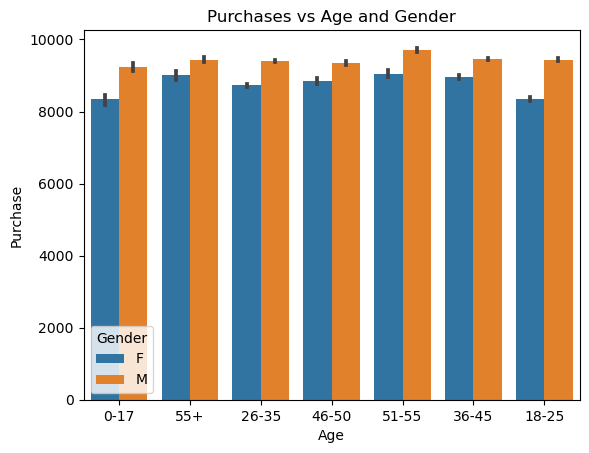

In [62]:
sns.barplot(data=df, x='Age', y='Purchase', hue='Gender')
plt.title('Purchases vs Age and Gender')
plt.show()

<div class='alert alert-info'>
    <h3>Observations:</h3>
    <ol>
        <li>Overall, <b>Age</b> and <b>Gender</b> has no major influence on Purchases.
        <li>Men has purchased more than women in every age group.
    </ol>
</div>

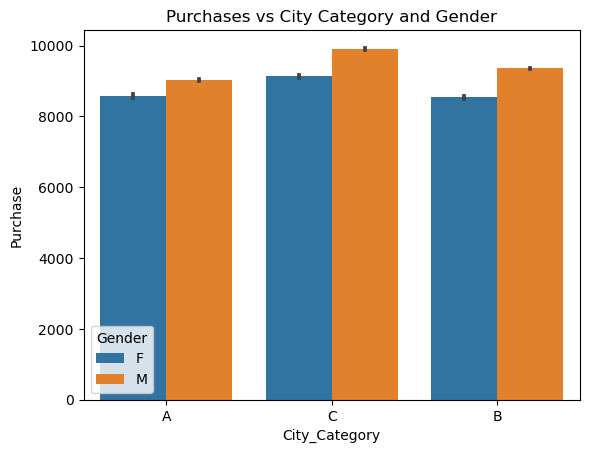

In [63]:
sns.barplot(data=df, x='City_Category', y='Purchase', hue='Gender')
plt.title('Purchases vs City Category and Gender')
plt.show()

<div class='alert alert-info'>
    <h3>Observations:</h3>
    <ol>
        <li>Overall, <b>City Category</b> and <b>Gender</b> has no major influence on Purchases.
        <li>Men has purchased more than women in every city category.
    </ol>
</div>

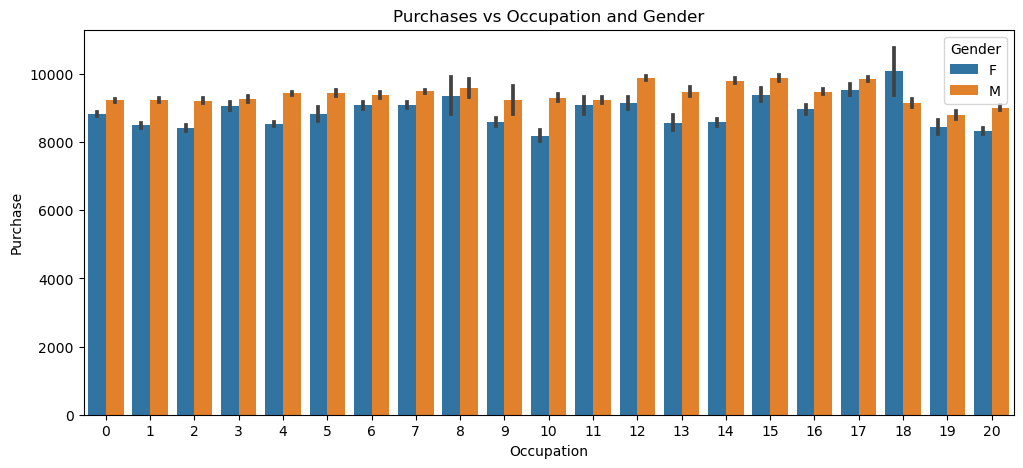

In [67]:
plt.figure(figsize=(12, 5))
sns.barplot(data=df, x='Occupation', y='Purchase', hue='Gender')
plt.title('Purchases vs Occupation and Gender')
plt.show()

<div class='alert alert-info'>
    <h3>Observations:</h3>
    <ol>
        <li>Overall, every <b>Occupation</b> has similar purchase pattern.
        <li>Men has purchased more than women in every Occupation except Occupation 18.
    </ol>
</div>

### Feature generation
Here we perform **One-Hot encoding** technique to generate new features based on some of the categorical features in the dataset.